In [1]:
from scipy.integrate import*
from numpy import*
from pylab import *
%matplotlib inline

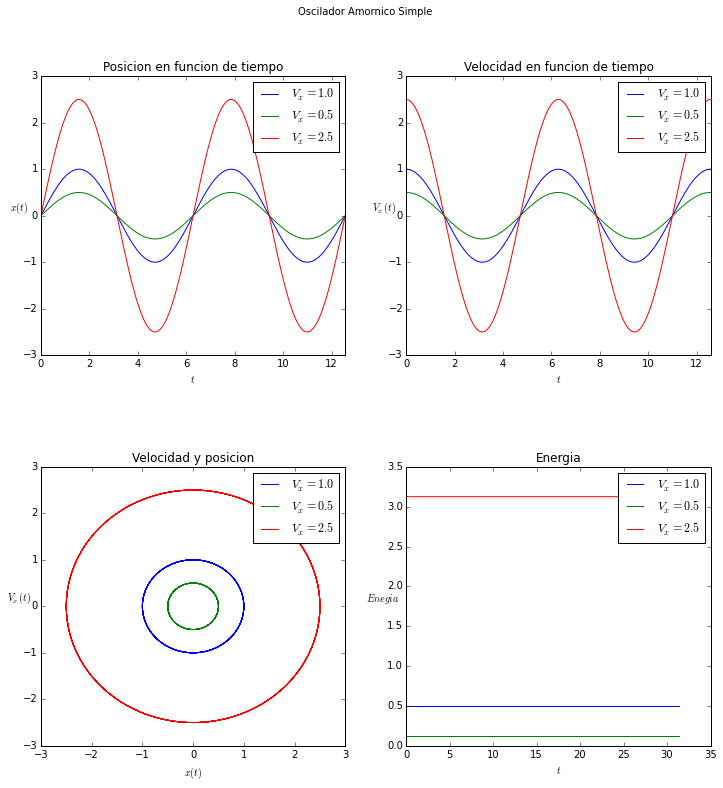

In [2]:
#####################################################
## programemos un oscilador armonico simple
## mx'' + kx=0
## Debemos integrar el siguiente cambio campo vectorial
## omega2 = k/m, consideramos m=1
def oas(ent,t,omega2):
    xdot= ent[1]
    vxdot=-omega2*ent[0]
    return xdot, vxdot

t=linspace(0,10*pi,1001)

ent = [0,1]
ent1 = [0,0.5]
ent2 = [0,2.5]
salida = odeint(oas,ent,t,args=(1,))
salida1 = odeint(oas,ent1,t,args=(1,))
salida2 = odeint(oas,ent2,t,args=(1,))



def energia(x,vx,omega2):
    E=[]
    for i in x:
        T = (0.5)*vx[i]*vx[i]
        U = (0.5)*omega2*x[i]*x[i]
        E.append(T+U)
    return E

ET = energia(salida[:,0],salida[:,1],1)
ET1 = energia(salida1[:,0],salida1[:,1],1)
ET2 = energia(salida2[:,0],salida2[:,1],1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

axes[0, 0].plot(t,salida[:,0],label="$V_x=1.0$")
axes[0, 0].plot(t,salida1[:,0],label="$V_x=0.5$")
axes[0, 0].plot(t,salida2[:,0],label="$V_x=2.5$")
axes[0, 0].set_title("Posicion en funcion de tiempo")
axes[0, 0].set_ylabel("$x(t)$",rotation='horizontal')
axes[0, 0].set_xlabel("$t$")
axes[0, 0].set_xlim(0,4*pi)
axes[0, 0].legend()

axes[0, 1].plot(t,salida[:,1],label="$V_x=1.0$")
axes[0, 1].plot(t,salida1[:,1],label="$V_x=0.5$")
axes[0, 1].plot(t,salida2[:,1],label="$V_x=2.5$")
axes[0, 1].set_title("Velocidad en funcion de tiempo")
axes[0, 1].set_ylabel("$V_x(t)$",rotation='horizontal')
axes[0, 1].set_xlabel("$t$")
axes[0, 1].set_xlim(0,4*pi)
axes[0, 1].legend()

axes[1, 0].plot(salida[:,0],salida[:,1],label="$V_x=1.0$")
axes[1, 0].plot(salida1[:,0],salida1[:,1],label="$V_x=0.5$")
axes[1, 0].plot(salida2[:,0],salida2[:,1],label="$V_x=2.5$")
axes[1, 0].set_title('Velocidad y posicion')
axes[1, 0].set_ylabel("$V_x(t)$",rotation='horizontal')
axes[1, 0].set_xlabel("$x(t)$")
axes[1, 0].legend()

axes[1, 1].plot(t,ET,label="$V_x=1.0$")
axes[1, 1].plot(t,ET1,label="$V_x=0.5$")
axes[1, 1].plot(t,ET2,label="$V_x=2.5$")
axes[1, 1].set_title('Energia' )
#axes[1, 1].set_ylim(0,1)
axes[1, 1].set_ylabel("$Enegia$",rotation='horizontal')
axes[1, 1].set_xlabel("$t$")
axes[1, 1].legend()

fig.suptitle("Oscilador Amornico Simple")
fig.subplots_adjust(hspace=0.4)
fig.savefig('oas.pdf', format='PDF')
fig.savefig('oas.png', format='PNG')
axes[0, 0].legend()
plt.show()

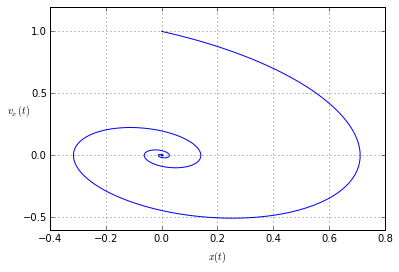

In [3]:
######################################################
## programemos un oscilador armonico amortiguado
## mx'' + 2betax'+ kx=0
## Debemos integrar el siguiente cambio campo vectorial

def oaa(ent,t,omega2,beta):
    xdot= ent[1]
    vxdot=-2*beta*ent[1]-omega2*ent[0]
    return xdot, vxdot
soaa =  odeint(oaa,ent,t,args=(1,0.25,))
plot(soaa[:,0],soaa[:,1])
xlabel("$x(t)$")
ylabel("$v_x(t)$",rotation='horizontal')
grid(True)
show()

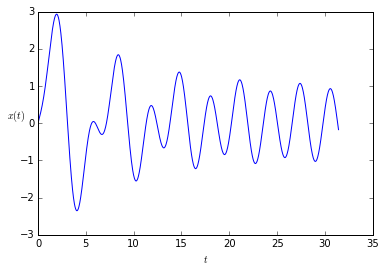

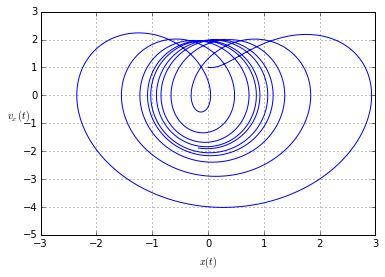

In [4]:

######################################################
## programemos un oscilador armonico amortiguado
## mx'' + 2betax'+ kx=Asin(omega*t)
## Debemos integrar el siguiente cambio campo vectorial
'''
    vx = x'
    vx' = -2*betax' -omega2x +A*sin(omega*t)
    '''
def oaaf(ent,t,omega2,beta,A,omega):
    xdot= ent[1]
    vxdot=-2*beta*ent[1]-omega2*ent[0]+A*sin(omega*t)
    return xdot, vxdot
soaaf =  odeint(oaaf,ent,t,args=(1,0.125,3,2))


plot(t,soaaf[:,0])
xlabel("$t$")
ylabel("$x(t)$",rotation='horizontal')
show()

plot(soaaf[:,0],soaaf[:,1])
xlabel("$x(t)$")
ylabel("$v_x(t)$",rotation='horizontal')
grid(True)
show()

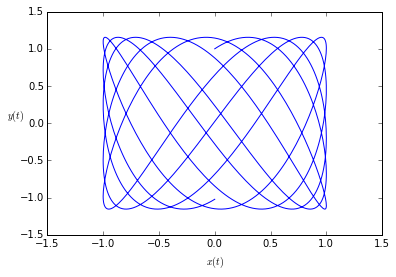

In [5]:
##########################################################################################
#### Oscilador armonico simple
#### mx'' + kx=0
def campo2(ent,t,omega):
        x_dot=ent[2]
        y_dot=ent[3]
        vx_dot=-omega*ent[0]
        vy_dot=-3*omega*ent[1]
        return x_dot,y_dot,vx_dot,vy_dot




entrada2 = [0,1,1,1]
s2=odeint(campo2,entrada2,t,args=(1,))
#print a,
plot(s2[:,0],s2[:,1])
xlabel("$x(t)$")
ylabel("$y(t)$",rotation="horizontal")
show()

#################################